# Quantum Wire

This example creates a infinitely long, finite width, quantum wire and plots the band structure, conductance, and wave functions. Adjust U0 to add disorder.

In [1]:
import kwant
from kwant.digest import uniform    # a (deterministic) pseudorandom number generator

In [2]:
%run matplotlib_setup.ipy

import numpy as np
from cmath import exp
from types import SimpleNamespace
import random
from matplotlib import pyplot


In [3]:
lat = kwant.lattice.square(a=1)

t = 1
W = 20
L = 40
U0 = 0.2 # run first with U0=0 (noise), then with U0=0.2 # restart kernel and run

sys = kwant.Builder()
sys[(lat(x, y) for x in range(L) for y in range(W))] = 4*t + U0*random.uniform(0,0.1)
sys[lat.neighbors()] = -t

lead = kwant.Builder(kwant.TranslationalSymmetry([-1, 0]))
lead[(lat(0, y) for y in range(W))] = 4 * t   # no disorder in lead!
lead[lat.neighbors()] = -t

sys.attach_lead(lead)
sys.attach_lead(lead.reversed())

sys = sys.finalized()

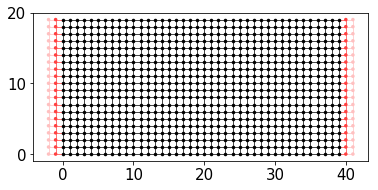

In [4]:
kwant.plot(sys);

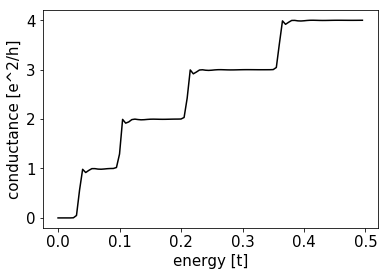

In [5]:
def plot_conductance(syst, energies):
    params = SimpleNamespace(U0=U0)
    # Compute conductance
    data = []
    for energy in energies:
        smatrix = kwant.smatrix(sys, energy)
        data.append(smatrix.transmission(1, 0))

    pyplot.figure()
    pyplot.plot(energies, data)
    pyplot.xlabel("energy [t]")
    pyplot.ylabel("conductance [e^2/h]")
    pyplot.show()

plot_conductance(sys, energies=[0.005 * i for i in range(100)])


(0, 1)

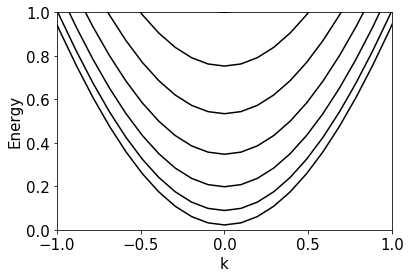

In [6]:
kwant.plotter.bands(sys.leads[0], show=False)
pyplot.xlim(-1,1)
pyplot.ylim(0,1)


In [7]:
from ipywidgets import interact

def plot_wf(nrg=0.03):
    params = SimpleNamespace(U0=U0)
    wfs = kwant.wave_function(sys, energy=nrg, args=[params])
    scattering_wf = wfs(0)  # all scattering wave functions from lead 0
    kwant.plotter.map(sys, np.sum(abs(scattering_wf)**2, axis=0));

interact(plot_wf, nrg=(0.0, 0.5, 0.002))

interactive(children=(FloatSlider(value=0.03, description='nrg', max=0.5, step=0.002), Output()), _dom_classes…

<function __main__.plot_wf(nrg=0.03)>